## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [2]:

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#Study Results DF
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Summary statistics

In [4]:
#Summary Stats Table 
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [55]:
# Combine the data into a single dataset
mousedatadf = mouse_metadata.merge(study_results, on='Mouse ID')
mousedatadf.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [7]:
# Mean of the tumor volume for each regimen.
TumorVolumeStats = mousedatadf[['Drug Regimen', 'Tumor Volume (mm3)']]
TumorVolumeStatsmean= TumorVolumeStats.groupby('Drug Regimen').mean()
TumorVolumeStatsmean = TumorVolumeStatsmean.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) Mean'})
TumorVolumeStatsmean



,Tumor Volume (mm3) Mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [8]:
# Median of the tumor volume for each regimen.
TumorVolumeStatsmedian= TumorVolumeStats.groupby('Drug Regimen').median()
TumorVolumeStatsmedian = TumorVolumeStatsmedian.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) Median'})
TumorVolumeStatsmedian

,Tumor Volume (mm3) Median
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.854632
Ramicane,40.673236
Stelasyn,52.431737


In [9]:
# Variance of the tumor volume for each regimen.
TumorVolumeStatsvar= TumorVolumeStats.groupby('Drug Regimen').var()
TumorVolumeStatsvar = TumorVolumeStatsvar.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) Variance'})
TumorVolumeStatsvar

,Tumor Volume (mm3) Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.351070
Ramicane,23.486704
Stelasyn,59.450562


In [10]:
# Standard deviation of the tumor volume for each regimen.
TumorVolumeStatsstd= TumorVolumeStats.groupby('Drug Regimen').std()
TumorVolumeStatsstd = TumorVolumeStatsstd.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) Standard Deviation'})
TumorVolumeStatsstd

,Tumor Volume (mm3) Standard Deviation
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.507770
Ramicane,4.846308
Stelasyn,7.710419


In [11]:
# Standard deviation of the tumor volume for each regimen.
TumorVolumeStatssem= TumorVolumeStats.groupby('Drug Regimen').sem()
TumorVolumeStatssem = TumorVolumeStatssem.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) SEM'})
TumorVolumeStatssem

,Tumor Volume (mm3) SEM
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


In [12]:
#Merge Tables: mean, median, variance, standard deviation, and SEM
TumorVolumeStats = TumorVolumeStats.merge(TumorVolumeStatsmean, on='Drug Regimen')
TumorVolumeStats = TumorVolumeStats.merge(TumorVolumeStatsmedian, on='Drug Regimen')
TumorVolumeStats = TumorVolumeStats.merge(TumorVolumeStatsvar, on='Drug Regimen')
TumorVolumeStats = TumorVolumeStats.merge(TumorVolumeStatsstd, on='Drug Regimen')
TumorVolumeStats = TumorVolumeStats.merge(TumorVolumeStatssem, on='Drug Regimen')
TumorVolumeStats



,Drug Regimen,Tumor Volume (mm3),Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
0,Ramicane,45.000000,40.216745,40.673236,23.486704,4.846308,0.320955
1,Ramicane,38.825898,40.216745,40.673236,23.486704,4.846308,0.320955
2,Ramicane,35.014271,40.216745,40.673236,23.486704,4.846308,0.320955
3,Ramicane,34.223992,40.216745,40.673236,23.486704,4.846308,0.320955
4,Ramicane,32.997729,40.216745,40.673236,23.486704,4.846308,0.320955
5,Ramicane,33.464577,40.216745,40.673236,23.486704,4.846308,0.320955
6,Ramicane,31.099498,40.216745,40.673236,23.486704,4.846308,0.320955
7,Ramicane,26.546993,40.216745,40.673236,23.486704,4.846308,0.320955
8,Ramicane,24.365505,40.216745,40.673236,23.486704,4.846308,0.320955
9,Ramicane,22.050126,40.216745,40.673236,23.486704,4.846308,0.320955


## Bar plots

In [13]:
# Set X and Y Axis for Chart showing number of data points for each treatment regimen
x_axis = TumorVolumeStats['Drug Regimen'].unique()
x_axis
y_axis = TumorVolumeStats['Drug Regimen'].value_counts()
y_axis
ticklocations = [value for value in x_axis]

In [14]:
RegimenDatapointsdf = pd.DataFrame(x_axis, y_axis)
RegimenDatapointsdf.reset_index(level=0, inplace=True)
RegimenDatapointsdf = RegimenDatapointsdf.set_index(list(RegimenDatapointsdf.columns[[1]]))
RegimenDatapointsdf

,Drug Regimen
0,
Ramicane,230
Capomulin,228
Infubinol,188
Placebo,186
Ceftamin,182
Stelasyn,181
Zoniferol,181
Ketapril,178
Propriva,178


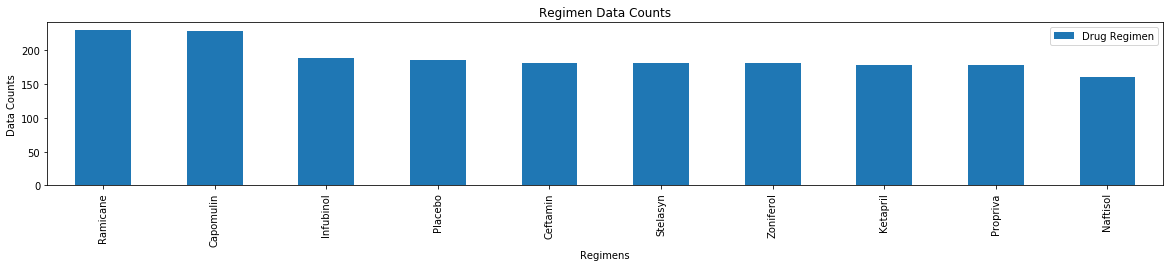

<Figure size 432x288 with 0 Axes>

In [15]:
RegimenDatapointsdf.plot(kind="bar", figsize=(20,3))
# Set a title for the chart
plt.title("Regimen Data Counts")
plt.xlabel('Regimens')
plt.ylabel('Data Counts')
plt.show()
plt.tight_layout()

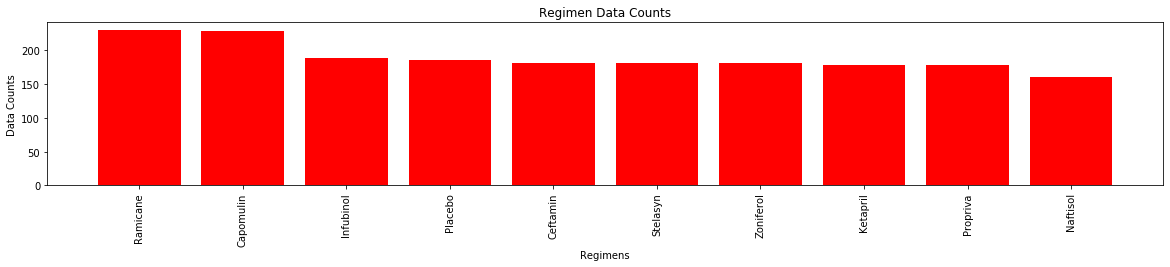

In [16]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='r', alpha=1.0, align="center")
plt.xticks(ticklocations, x_axis, rotation="vertical")
plt.title("Regimen Data Counts")
plt.xlabel('Regimens')
plt.ylabel('Data Counts')
#plt.legend(handles=[x_axis, y_axis], loc="best")<<<<<<<Ask TA
#plt.tight_layout()
plt.show()

## Pie plots

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
SexDistributiondf = mousedatadf.groupby(['Drug Regimen', 'Sex']).count()
SexDistributiondf
#Micesex = mousedatadf['Sex'].value_counts()
#Micesex


Mouse ID  Age_months  Weight (g)  Timepoint  \
Drug Regimen Sex                                                   
Capomulin    Female       128         128         128        128   
             Male         102         102         102        102   
Ceftamin     Female        92          92          92         92   
             Male          86          86          86         86   
Infubinol    Female        95          95          95         95   
             Male          83          83          83         83   
Ketapril     Female        58          58          58         58   
             Male         130         130         130        130   
Naftisol     Female        86          86          86         86   
             Male         100         100         100        100   
Placebo      Female       102         102         102        102   
             Male          79          79          79         79   
Propriva     Female        74          74          74         74   
             Male          87          87          87         87   
Ramicane     Female        74          74          74         74   
             Male         154         154         154        154   
Stelasyn     Female       107         107         107        107   
             Male          74          74          74         74   
Zoniferol    Female       119         119         119        119   
             Male          63          63          63         63   

                     Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen Sex                                           
Capomulin    Female                 128               128  
             Male                   102               102  
Ceftamin     Female                  92                92  
             Male                    86                86  
Infubinol    Female                  95                95  
             Male                    83                83  
Ketapril     Female                  58                58  
             Male                   130               130  
Naftisol     Female                  86                86  
             Male                   100               100  
Placebo      Female                 102               102  
             Male                    79                79  
Propriva     Female                  74                74  
             Male                    87                87  
Ramicane     Female                  74                74  
             Male                   154               154  
Stelasyn     Female                 107               107  
             Male                    74                74  
Zoniferol    Female                 119               119  
             Male                    63                63

In [18]:
SexCounts = SexDistributiondf['Mouse ID']
SexCountsdf = pd.DataFrame(SexCounts)
SexCountsdf

Mouse ID
Drug Regimen Sex             
Capomulin    Female       128
             Male         102
Ceftamin     Female        92
             Male          86
Infubinol    Female        95
             Male          83
Ketapril     Female        58
             Male         130
Naftisol     Female        86
             Male         100
Placebo      Female       102
             Male          79
Propriva     Female        74
             Male          87
Ramicane     Female        74
             Male         154
Stelasyn     Female       107
             Male          74
Zoniferol    Female       119
             Male          63

AttributeError: 'Text' object has no property 'bbox_to_anchor'

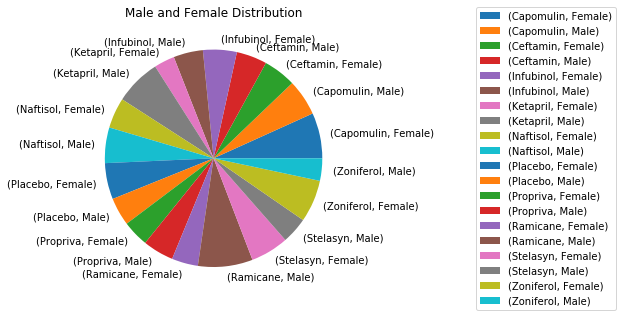

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

plot = SexCountsdf.plot.pie(y='Mouse ID', figsize=(5, 5), legend=False)
plt.title('Male and Female Distribution', color='black')
plt.legend(loc='right', bbox_to_anchor=(2, 0.5))
plt.ylabel('' , bbox_to_anchor=(2, 0.5))

Text(0.5, 1.0, 'Male and Female Distribution')

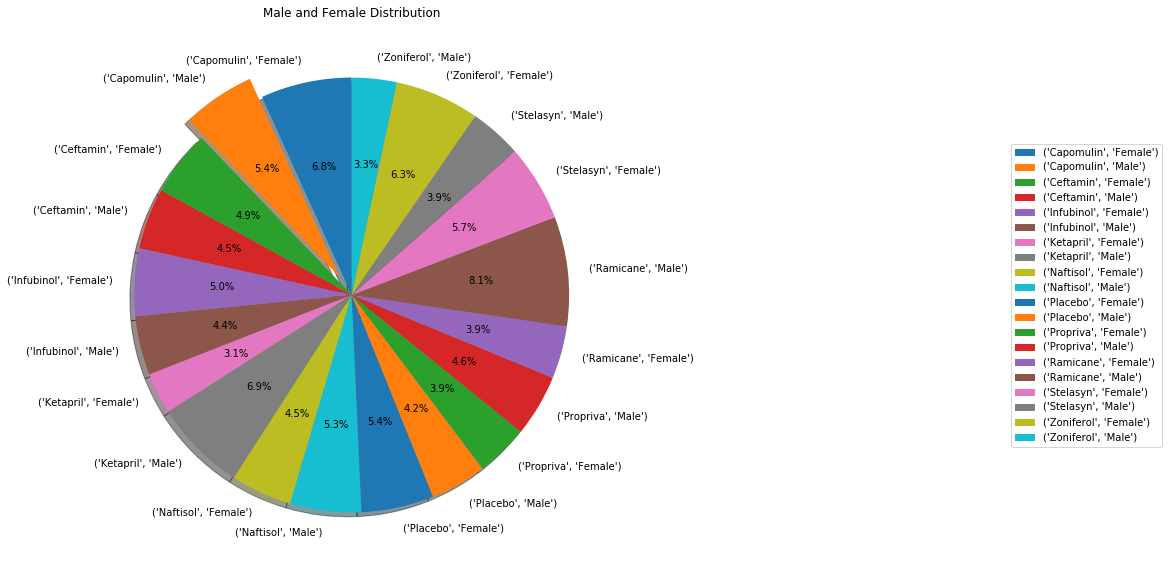

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10,10))
labels=SexCountsdf.index.values.tolist()
plt.pie(SexCounts, explode=(0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(loc='right', bbox_to_anchor=(2, 0.5))
plt.title('Male and Female Distribution', color='black')



## Quartiles, outliers and boxplots

In [80]:
Tumorvolumesdf = (mousedatadf[['Drug Regimen', 'Tumor Volume (mm3)']])
Tumorvolumesdf.head()

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729


In [79]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#Determine Most successful regimens (Greatest Reductions In Tumor Volume)

tumorreductions=[]
Regimentests=[]
for x in range(0, len(Tumorvolumesdf)-9):
    if Tumorvolumesdf.iloc[x+1,1] == 45:
        reduction = (45 - Tumorvolumesdf.iloc[x,1])
        tumorreductions.append(reduction)
        Regimentests.append(Tumorvolumesdf.iloc[x,0])
Regimensuccessdf = pd.DataFrame(tumorreductions, Regimentests)
#Regimensuccessdf = Regimensuccessdf.sort_values(by = 0, ascending =False )
Regimensuccessdf.reset_index(inplace=True)
Regimensuccessdf.head()



,index,0
0,Ramicane,22.949874
1,Capomulin,21.656402
2,Capomulin,16.515967
3,Capomulin,16.569036
4,Ramicane,15.871528


In [81]:
#Find Number of Trials per Regimen
RegimenTrials = Regimensuccessdf['index'].value_counts()
RegimenTrials

Propriva     26
Infubinol    25
Ceftamin     25
Capomulin    25
Ramicane     25
Ketapril     25
Zoniferol    25
Placebo      25
Naftisol     24
Stelasyn     24
Name: index, dtype: int64

In [92]:
#Calculate mean of Reductions per top 4 Regimen
sumofReductions = Regimensuccessdf.groupby(['index']).sum()
sumofReductions['Total Trials per Regimen']= RegimenTrials
sumofReductions['Mean Reduction per Regimen']=sumofReductions[0]/sumofReductions['Total Trials per Regimen']
sumofReductions=sumofReductions.sort_values(by = 'Mean Reduction per Regimen', ascending =False )
sumofReductions=sumofReductions[:4]
sumofReductions

,0,Total Trials per Regimen,Mean Reduction per Regimen
index,,,
Ramicane,220.215239,25,8.808610
Capomulin,208.310807,25,8.332432
Propriva,-293.424090,26,-11.285542
Ceftamin,-318.849421,25,-12.753977


In [105]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
Regimensuccessdfindexed = Regimensuccessdf.set_index('index')
Ramicanedf=Regimensuccessdfindexed.drop(["Propriva", "Infubinol","Ceftamin","Capomulin","Ketapril","Zoniferol","Placebo","Naftisol","Stelasyn"])
Capomulindf=Regimensuccessdfindexed.drop(["Propriva", "Infubinol","Ceftamin","Ramicane","Ketapril","Zoniferol","Placebo","Naftisol","Stelasyn"])
Proprivadf=Regimensuccessdfindexed.drop(["Infubinol","Ceftamin","Capomulin","Ramicane","Ketapril","Zoniferol","Placebo","Naftisol","Stelasyn"])
Ceftamindf=Regimensuccessdfindexed.drop(["Propriva", "Infubinol","Capomulin","Ramicane","Ketapril","Zoniferol","Placebo","Naftisol","Stelasyn"])

#Ramicanefinalvolumes=Regimensuccessdfindexed['Ramicane']

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumorvolumesdf
F = Tumorvolumesdf.iloc[9,1]-Tumorvolumesdf.iloc[0,1]
print('Frind')

In [ ]:
#for x in range(0, 1893, 9):
    #print (x)


## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen